# Exercise 4: Logistic Regression, Bayes and EM

In this assignment you will implement several algorithms as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install (1.15.4). Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
7. Write your own code. Cheating will not be tolerated.
8. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw4_123456789_987654321.ipynb` if you submitted in pairs and `hw4_123456789.ipynb` if you submitted the exercise alone.
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Implement Logistic Regression algorithm.
1. Implement EM algorithm.
1. Implement Navie Bayes algorithm that uses EM for calculating the likelihood.
1. Visualize your results.

# I have read and understood the instructions: *** YOUR ID HERE ***

In [122]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [124]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

## Visualizing the data
(2 points each - 8 points total)

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

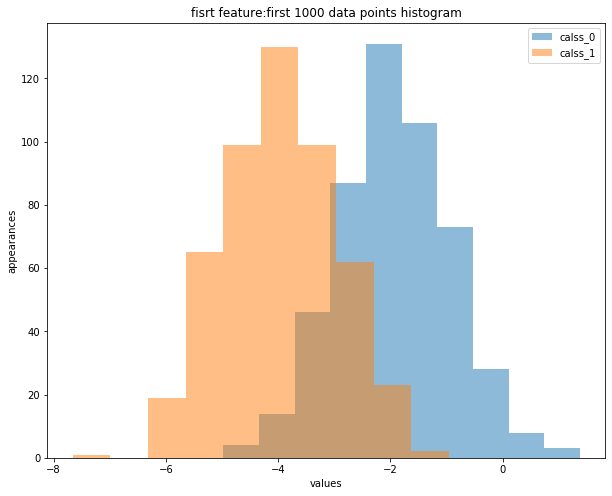

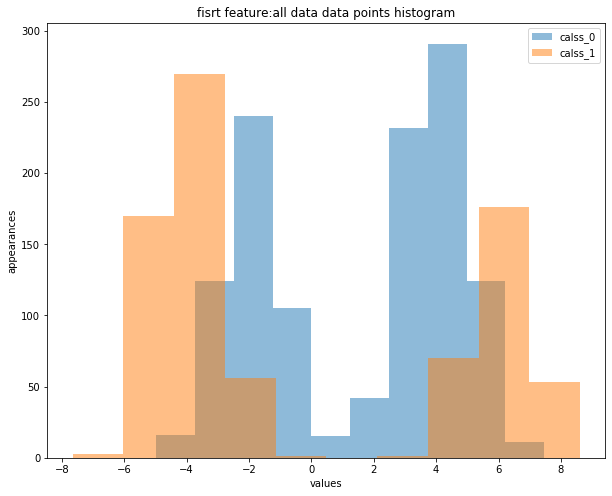

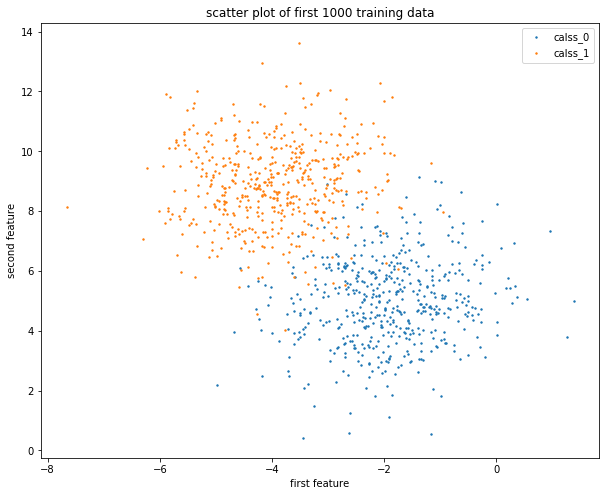

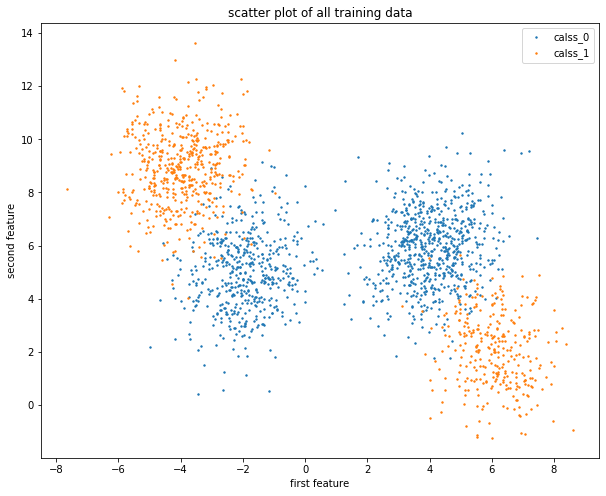

In [125]:
#### Your code here ####
#For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
first_1000_x=X_training[:1000]
first_1000_x=first_1000_x[:,0]
first_1000_y=y_training[:1000]
first_1000=np.column_stack([first_1000_x, first_1000_y])


sorted_data=first_1000[np.argsort(first_1000[:,first_1000.shape[1]-1])]
S_size=first_1000.shape[0]
current = sorted_data[0][first_1000.shape[1]-1]
size = sorted_data.shape[0]
index = 0
for i in range(size):
    if sorted_data[i][first_1000.shape[1]-1] != current:
        index = i
        break
class_0=sorted_data[0:i,0]
class_1=sorted_data[i:size,0]

plt.hist(class_0, bins=10, alpha=0.5)
plt.hist(class_1, bins=10, alpha=0.5)
plt.xlabel('values')
plt.ylabel('appearances')
plt.legend(['calss_0', 'calss_1'])
plt.title('fisrt feature:first 1000 data points histogram')
plt.show()

#For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).
first_feature_all_data=np.column_stack([X_training[:,], y_training])
sorted_data=first_feature_all_data[np.argsort(first_feature_all_data[:,first_feature_all_data.shape[1]-1])]
S_size=first_feature_all_data.shape[0]
current = sorted_data[0][first_feature_all_data.shape[1]-1]
size = sorted_data.shape[0]
index = 0
for i in range(size):
    if sorted_data[i][first_feature_all_data.shape[1]-1] != current:
        index = i
        break
class_0=sorted_data[0:i,0]
class_1=sorted_data[i:size,0]
plt.hist(class_0, bins=10, alpha=0.5)
plt.hist(class_1, bins=10, alpha=0.5)
plt.xlabel('values')
plt.ylabel('appearances')
plt.legend(['calss_0', 'calss_1'])
plt.title('fisrt feature:all data data points histogram')
plt.show()

#For the first 1000 data points plot a scatter plot where each class has different color
first_1000_x=X_training[:1000]
first_1000_y=y_training[:1000]
first_1000=np.column_stack([first_1000_x, first_1000_y])

sorted_data=first_1000[np.argsort(first_1000[:,first_1000.shape[1]-1])]
S_size=first_1000.shape[0]
current = sorted_data[0][first_1000.shape[1]-1]
size = sorted_data.shape[0]
index = 0
for i in range(size):
    if sorted_data[i][first_1000.shape[1]-1] != current:
        index = i
        break
class_0_0=sorted_data[0:i,0]
class_0_1=sorted_data[0:i,1]

class_1_0=sorted_data[i:size,0]
class_1_1=sorted_data[i:size,1]


plt.scatter(class_0_0, class_0_1, s=2)
plt.scatter(class_1_0, class_1_1, s=2)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('scatter plot of first 1000 training data')
plt.legend(['calss_0', 'calss_1'])
plt.show()

#For all the data points plot a scatter plot where each class has different color
first_feature_all_data=np.column_stack([X_training, y_training])
sorted_data=first_feature_all_data[np.argsort(first_feature_all_data[:,first_feature_all_data.shape[1]-1])]
S_size=first_feature_all_data.shape[0]
current = sorted_data[0][first_feature_all_data.shape[1]-1]
size = sorted_data.shape[0]
index = 0
for i in range(size):
    if sorted_data[i][first_feature_all_data.shape[1]-1] != current:
        index = i
        break
class_0_0=sorted_data[0:i,0]
class_0_1=sorted_data[0:i,1]

class_1_0=sorted_data[i:size,0]
class_1_1=sorted_data[i:size,1]

plt.scatter(class_0_0, class_0_1, s=2)
plt.scatter(class_1_0, class_1_1, s=2)
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.title('scatter plot of all training data')
plt.legend(['calss_0', 'calss_1'])
plt.show()

## Logistic Regression

(20 Points)

Implement the Logistic Regression algorithm that uses gradient descent for finding the optimal theta vector. 

Where:
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

$$
J(\theta)=\frac{1}{m} \sum_{d=1}^{m} - y^{(d)}ln(h_\theta(x^{(d)}) - (1 - y^{(d)})ln(1 - h_\theta(x^{(d)})
$$

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance after the fit function was executed

\* You can add more functions if you think this is necessary

Your model should also store a list of the costs that you've calculated in each iteration

In [126]:
class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state
        self.cost_history=[]
        self.theta=None

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """
        np.random.seed(42)
        #pre-processing the data (bias trick)
        self.theta = np.random.random(size=X.shape[1]+1)
        X= np.column_stack((np.ones(X.shape[0]),X))
        self.theta=self.gradinet_decent(self.eta,self.n_iter,self.eps,X,y,self.theta)
        
    def get_theta(self):
        return self.theta
    
    def get_cost_history(self):
        return self.cost_history
    
    def compute_cost(self,X,y,theta):
        m=y.size
        J=(1/y.shape[0])*(np.dot(-y,np.log(self.S_function(X,theta)))-(np.dot(1-y,np.log(1-self.S_function(X,theta)))))
        return J
    #sigmuid function    
    def S_function(self,X,theta):
        return np.exp(np.dot(X,theta))/(1+np.exp(np.dot(X,theta)))
    #find thetha which minimize the error using gradient decent   
    def gradinet_decent(self,eta,n_iter,eps,X,y,theta):
        theta_tmp=theta
        self.cost_history.append(self.compute_cost(X,y,theta_tmp))
        for i in range(n_iter):
            theta_tmp=theta_tmp-eta*np.dot(self.S_function(X,theta_tmp)-y,X)
            self.cost_history.append(self.compute_cost(X,y,theta_tmp))
            if self.cost_history[i]-self.cost_history[i+1]<eps:
                break
        return theta_tmp
    
    def bias(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.concatenate((ones, X), axis=1)
    
    def predict(self, X):
        """Return the predicted class label"""
        if (X.shape[0] > 1):
            X = self.bias(X)
        else:
            X = np.concatenate(([1], X))
        return np.around(self.S_function(X,self.theta))
        

## Cross Validation

(10 points)

Use 5-fold cross validation in order to find the best eps and eta params from the given lists.

Shuffle the training set before you split the data to the folds.

In [127]:
#### Your code here ####
etas = [0.05, 0.005, 0.0005, 0.00005, 0.000005]
epss = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
#find all the pemutations of the given hyper parameters
hyper_param_permutation=[]
for eta in etas:
    for eps in epss:
        temp=[]
        temp.append(eta)
        temp.append(eps)
        hyper_param_permutation.append(temp)
        
data_shuffle = np.column_stack((X_training,y_training))
np.random.shuffle(data_shuffle)
size=int(data_shuffle.shape[0]/5)
best_accuracy=0
best_param=hyper_param_permutation[0]
#find besy hyper parameters using cross validation
for parm in hyper_param_permutation:
    accracy_vec=[]
    for i in range(5):
        data_shuffle_val = data_shuffle[(i*size):((i+1)*size),:]
        data_shuffle_train1 = data_shuffle[0:(i*size),:]
        data_shuffle_train2 = data_shuffle[((i+1)*size):data_shuffle.shape[0],:]
        data_shuffle_train=np.vstack([data_shuffle_train1, data_shuffle_train2])
        
        X_train=data_shuffle_train[:,[0,1]]
        y_train=data_shuffle_train[:,-1]
        X_val=data_shuffle_val[:,[0,1]]
        y_val=data_shuffle_val[:,-1]
        
        lg_temp=LogisticRegressionGD(eta=parm[0],n_iter=1000,eps=parm[1],random_state=1)
        lg_temp.fit(X_train,y_train)
        accracy_vec.append(lg_temp.predict(X_val) == y_val)
    cur_accuracy=np.mean(accracy_vec)
    if(cur_accuracy>best_accuracy):
        best_accuracy=cur_accuracy
        best_param=parm
        
print("best param: \n" + "best eta:"+ str(best_param[0])+"\n" + "best eps: " + str(best_param[1])) 


best param: 
best eta:5e-05
best eps: 1e-06


## Normal distribution pdf

(5 Points)

Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write an efficient vectorized code

In [128]:
#### Your code here ####
# calc normal pdf    
def norm_pdf(data, mu, sigma):
    normal_pdf=(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(1 / 2) * (np.square((data - mu) / sigma)))
    return normal_pdf

## Expectation Maximization

(20 Points)

Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use -log likelihood as the cost function:
$$
cost(x) = \sum_{d=1}^{m}-log(w * pdf(x; \mu, \sigma))
$$

\* The above is the cost of one gaussian. Think how to use the cost function for gaussian mixture.

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function
1. get_dist_params - return the distribution params

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [129]:
class EM(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM proccess
    eps: float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, n_iter=1000, eps=0.01):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps
        self.mu = None
        self.sigma = None
        self.w = None
        self.resp = None
        self.pdf=None

    # initial guesses for parameters
    def init_params(self, data):
        """
        Initialize distribution params
        """
        #initial k mu randomly
        low = np.min(data)
        high = np.max(data)
        self.mu = np.random.uniform(low,high,self.k)

        #initial k sigma randomly
        self.sigma=np.asarray([1]*self.k)
        self.sigma=self.sigma.astype(float)

        #initial the weights for each gaussians
        self.w = [1./self.k] * self.k
        
        #responsability matrix (number of instance X k) is initialized to zeros
        self.resp =np.zeros(shape=(data.shape[0],self.k))
        self.pdf=np.zeros(shape=(data.shape[0],self.k))

        
        
    def expectation(self, data):
        """
        E step - calculating responsibilities
        """
        #calculate responsibilities using the current mu, sigma and w
        for i in range(self.k):
            for j in range(data.shape[0]):
                self.resp[j,i]=norm_pdf(data[j],self.mu[i],self.sigma[i])*self.w[i]
        vec_sum = self.resp.sum(axis=1)
        for i in range(self.k):
            self.resp[:,i]=self.resp[:,i]/vec_sum
      
    def maximization(self, data):
        """
        M step - updating distribution params
        """
        #update mu, sigma and w
        n = data.shape[0]
        self.w =np.mean(self.resp,axis=0)
        for i in range(self.k):
            self.mu[i] = (1/(self.w[i]*n))*np.dot(self.resp[:,i],data)
            self.sigma[i] = np.sqrt((1/(self.w[i]*n))*np.dot(self.resp[:,i],np.square(data-self.mu[i])))
    # helper function to compute vector of pdf's
    def pdf_comp(self,data):
        for i in range(self.k):
            for j in range(data.shape[0]):
                self.pdf[j,i]=norm_pdf(data[j],self.mu[i],self.sigma[i])
    
    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function in order to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        # keep updating the distrebution parameters untol the sum of each feature log cost converge
        log_cost=[]
        self.init_params(data)
        self.pdf_comp(data)
        log_cost.append(np.sum(-np.log(np.sum(np.dot(self.pdf,self.w)))))
        for i in range(self.n_iter):
            self.expectation(data)
            self.maximization(data)
            self.pdf_comp(data)           
            log_cost.append(np.sum(np.log(np.sum(np.dot(self.pdf,self.w)))))
            if (np.abs(log_cost[i]-log_cost[i+1])<eps):
                break

    def get_dist_params(self):
        return self.w,self.mu,self.sigma
    

## Naive Bayes

(20 Points)

Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [130]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gauusian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """
    def __init__(self, k=1):
        self.k = k
        self.params = None
        self.y = None

    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """
        self.y = y
        self.params = [[], []]
        for i in range(X.shape[1]):
            current_em = EM(k=self.k)
            current_em.fit(X[y == 0][:, i])
            self.params[0].append({ 'mu': current_em.mu, 'sigma': current_em.sigma })
            current_em.fit(X[y == 1][:, i])
            self.params[1].append({ 'mu': current_em.mu, 'sigma': current_em.sigma })             
                
    def get_prior(self, class_val):
        return np.unique(self.y, return_counts=True)[1][class_val] / self.y.shape[0]  
    
    def get_instance_likelihood(self, x, class_val):
        max_pdf_vec = np.empty((x.shape[0],0))
         #this loop iterate all features.
        for i in range(x.shape[1]):
            pdf_vec = np.empty((x.shape[0],0))
            #this loop iterate k (number of gussian)
            for j in range(self.k):
                cur_mu = self.params[class_val][i]['mu'][j]
                cur_sigma = self.params[class_val][i]['sigma'][j]
                pdf_vec = np.append(pdf_vec, norm_pdf(x[:, i], cur_mu, cur_sigma)[:, np.newaxis], axis=1)
            max_pdf_vec = np.append(max_pdf_vec, np.max(pdf_vec, axis=1)[:, np.newaxis], axis=1)
        return np.prod(max_pdf_vec, axis=1)
    
    def get_instance_posterior(self, x, class_val):
        return (self.get_prior(class_val))*(self.get_instance_likelihood(x,class_val))
        
    def predict(self, X):
        """Return the predicted class label"""
        return (self.get_instance_posterior(X, 0) <= self.get_instance_posterior(X, 1))

## Model evaluation

(10 points)

In this section you will build 2 models and fit them to 2 datasets

First 1000 training points and first 500 test points:
1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit Logistic Regression model with the best params you found earlier.
1. Fit Naive Bayes model. Remember that you need to select the number of gaussians in the EM.
1. Print the training and test accuracies for each model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for each model (for this you need to use the training set as the input)
1. Plot the cost Vs the iteration number for the Logistic Regression model

Use all the training set points:
1. Repeat sections 2-6 for all the training set points

=================== accuracy first point data ===================
accuracy of 500 test point using LoR: 0.938
accuracy of 1000 training point using LoR:0.965
accuracy of 500 test point using NbG: 0.934
accuracy of 1000 training point using NbG: 0.948
=================== accuracy all data ===================
accuracy of all test point using LoR: 0.804
accuracy of all training point using LoR: 0.809
accuracy of all test point using NbG: 0.901
accuracy of all training point using NbG: 0.914


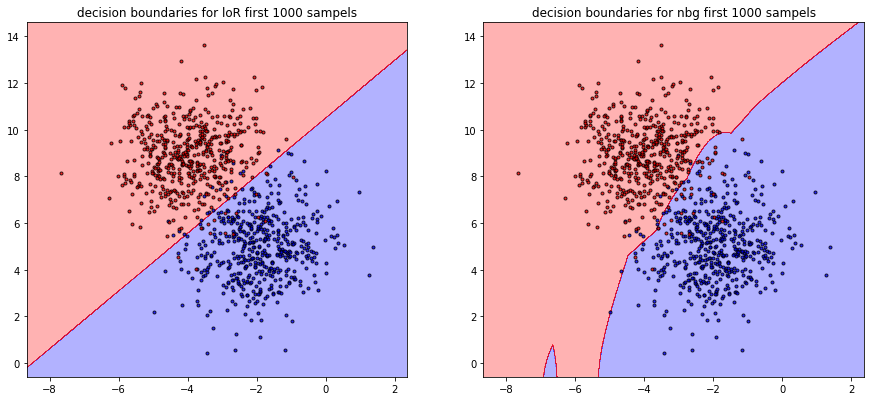

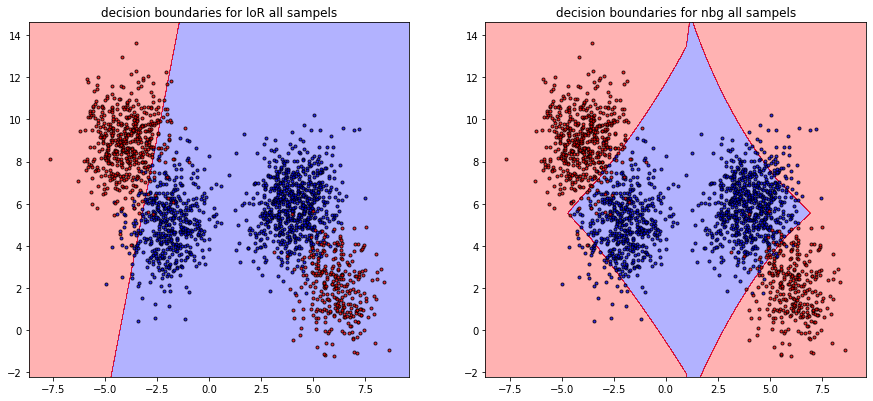

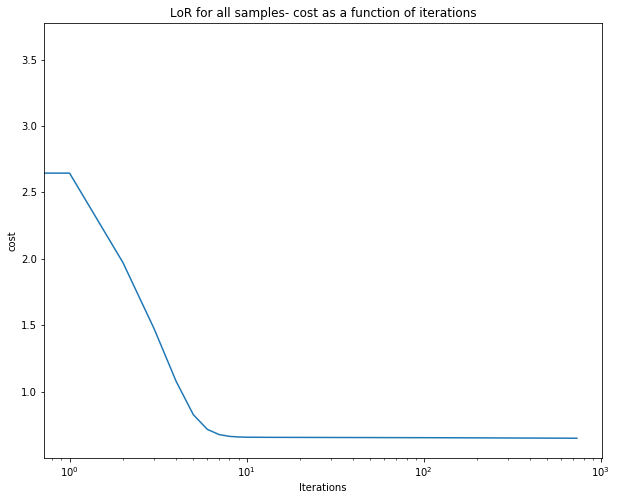

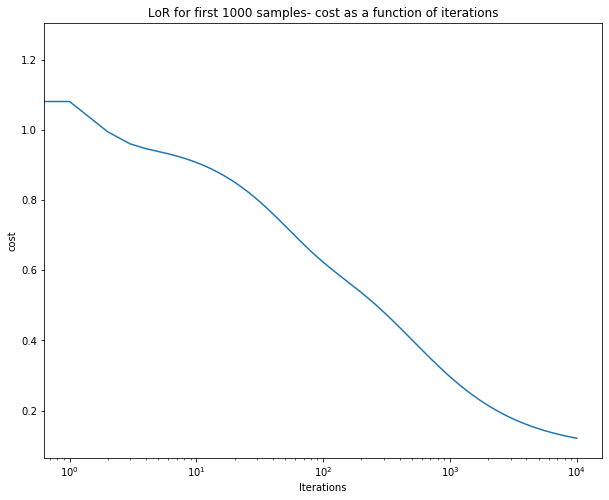

In [131]:
first_1000_x_train = X_training[:1000]
first_1000_y__train = y_training[:1000]
first_1000_train = np.column_stack([first_1000_x, first_1000_y])

first_500_x_test = X_test[:500]
first_500_y_test = y_test[:500]

loR_1000 = LogisticRegressionGD(eta=best_param[0], n_iter=10000, eps=best_param[1] ,random_state=1)
loR_1000.fit(first_1000_x_train,first_1000_y__train)

nbg_1000 = NaiveBayesGaussian(2)
nbg_1000.fit(first_1000_x_train,first_1000_y__train)

print("=================== accuracy first point data ===================")
print("accuracy of 500 test point using LoR: "+ str(np.mean(loR_1000.predict(first_500_x_test)==first_500_y_test)))
print("accuracy of 1000 training point using LoR:"+ str(np.mean(loR_1000.predict(first_1000_x_train)==first_1000_y__train)))
print("accuracy of 500 test point using NbG: "+ str(np.mean(nbg_1000.predict(first_500_x_test)==first_500_y_test)))
print("accuracy of 1000 training point using NbG: "+ str(np.mean(nbg_1000.predict(first_1000_x_train)==first_1000_y__train)))

loR_all = LogisticRegressionGD(eta=best_param[0], n_iter=10000, eps=best_param[1] ,random_state=1)
loR_all.fit(X_training,y_training)

nbg_all = NaiveBayesGaussian(2)
nbg_all.fit(X_training,y_training)

print("=================== accuracy all data ===================")
print("accuracy of all test point using LoR: "+ str(np.mean(loR_all.predict(X_test)==y_test)))
print("accuracy of all training point using LoR: "+ str(np.mean(loR_all.predict(X_training)==y_training)))
print("accuracy of all test point using NbG: "+ str(np.mean(nbg_all.predict(X_test)==y_test)))
print("accuracy of all training point using NbG: "+ str(np.mean(nbg_all.predict(X_training)==y_training)))

plt.figure(figsize=(15,30))
plt.subplot(4, 2, 1)
plot_decision_regions(first_1000_x_train, first_1000_y__train, loR_1000, resolution=0.01)
plt.title("decision boundaries for loR first 1000 sampels")

plt.subplot(4, 2, 2)
plot_decision_regions(first_1000_x_train, first_1000_y__train, nbg_1000, resolution=0.01)
plt.title("decision boundaries for nbg first 1000 sampels")

plt.figure(figsize=(15,30))
plt.subplot(4, 2, 3)
plot_decision_regions(X_training, y_training, loR_all, resolution=0.01)
plt.title("decision boundaries for loR all sampels")

plt.subplot(4, 2, 4)
plot_decision_regions(X_training, y_training, nbg_all, resolution=0.01)
plt.title("decision boundaries for nbg all sampels")

plt.figure()
plt.plot(np.arange(len(loR_all.cost_history)), loR_all.cost_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('LoR for all samples- cost as a function of iterations')
plt.show()

plt.plot(np.arange(len(loR_1000.cost_history)), loR_1000.cost_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('LoR for first 1000 samples- cost as a function of iterations')
plt.show()

## Open question

(7 points) 

Will Full Bayes get better results comparing to Naive Bayes on the following dataset? Explain. 

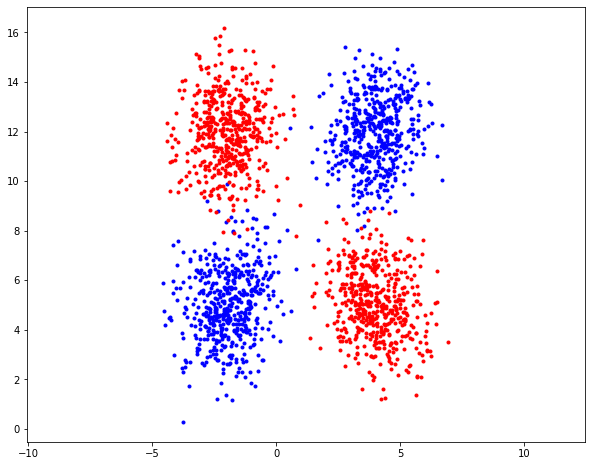

In [132]:
mean = [[-2,5], [-2, 12], [4, 12], [4, 5]]
cov = [[[1,0.2],[0.2,2]], [[1,0],[0,2]], [[1,0.2],[0.2,2]], [[1,-0.2],[-0.2,2]]]
x1 = []
x2 = []
y = []
size = [500, 500, 500, 500]
c = ['b', 'r']
for i in range(4):
    xx1,xx2 = np.random.multivariate_normal(mean[i],cov[i],size[i]).T
    x1.extend(xx1)
    x2.extend(xx2)
    y.extend([i%2] * size[i])
    plt.scatter(xx1,xx2, marker='.', c=c[i%2])
plt.axis('equal')
plt.show()

#### Your answer here ####
From the way that data has been constructed the instances from each class (Red or Blue) comes from Gaussian mixture. Note that for 3 out of the 4 Gaussians the covariancebetween the features given their classes is not 0 (0.2 or -0.2). So, there is Some (relatively weak) correlation between those features given their classes. Therefore, by using Naïve Bayes when learning the execution algorithm, we compute the likelihood for each instance to by classified Red/Blue by multiplying the likelihoods of each feature value to be classified Red/Blue. By doing it we treat the data as every feature is independent given the class.
To sum it up, it seems that it is wise to use full Bayes given all said above and the fact that we don’t have many
parameters to learn (2 variances and 1 covariance for every Gaussian).